\- 결과 미리보기 -
# MinMaxScaler - 0.8458
# StandardScaler - 0.8429
# MaxAbsScaler - 0.8426
# RobustScaler - 0.8440
# Normalizer - 0.8446

In [21]:
#상위 폴더 load_data파일 불러오기 위해 경로 추가
import sys
sys.path.append('../')  # 상위 폴더(main_folder)의 경로를 추가

# 데이터 가져오기
from load_data import load_data

# 사용자 지정 함수 불러오기
from eval import get_Accuracy_tf

# 텐서플로
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as Layer

# 사이킷런
from sklearn.pipeline import Pipeline

# 콜백
from timeit import default_timer as timer

# 그리드 서치
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# 그래프
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
# 랜덤시드 고정
tf.random.set_seed(42)

In [3]:
# MinMaxScaler - 0, StandardScaler - 1, , MaxAbsScaler - 2, RobustScaler - 3, Normalizer - 4
X_train0, X_val0, X_test0, y_train0, y_val0, y_test0, scaler0  = load_data(scaler=0)
X_train1, X_val1, X_test1, y_train1, y_val1, y_test1, scaler1  = load_data(scaler=1)
X_train2, X_val2, X_test2, y_train2, y_val2, y_test2, scaler2  = load_data(scaler=2)
X_train3, X_val3, X_test3, y_train3, y_val3, y_test3, scaler3  = load_data(scaler=3)
X_train4, X_val4, X_test4, y_train4, y_val4, y_test4, scaler4  = load_data(scaler=4)

X_train1.shape, X_val1.shape, X_test2.shape, y_train2.shape, y_val2.shape, y_test2.shape, scaler2



((2672, 10), (669, 10), (836, 10), (2672,), (669,), (836,), MaxAbsScaler())

In [4]:

def get_model(nodes=4, drop_rate= 0.2, activation= 'relu'):
  # base 모델 만들기

  model = Sequential([Layer.Dense(nodes, input_shape=(len(X_train0.columns),))])
  model.add(Layer.Dense(nodes, activation = activation))
  model.add(Layer.Dense(1, activation = 'relu'))

  model.compile(optimizer = 'adam',
                loss='mean_squared_error',
                metrics = [get_Accuracy_tf])

  return model

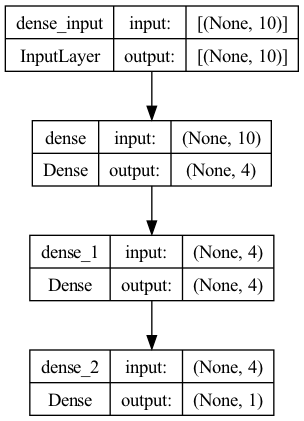

In [5]:
model = get_model()
keras.utils.plot_model(model, show_shapes=True)

In [6]:

# 학습 소요 시간 표시 콜백용 class 정의
class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        print("Starting training")
        self.starttime = timer()

    def on_train_end(self, logs=None):
        print("End of training, took {} seconds".format(timer()-self.starttime))

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
          print("Epoch is {} and {} seconds passed".format(epoch, timer()-self.starttime))

In [7]:
check_path = 'model_weight.h5'

callback = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=50),
    tf.keras.callbacks.ModelCheckpoint(filepath=check_path, save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=200, min_lr=0.001),
    TimingCallback()
]

In [8]:
history0 = model.fit(X_train0, y_train0, batch_size= 1024, epochs= 1000,  validation_data=(X_val0, y_val0), callbacks=callback,verbose = 0)
results0 = model.evaluate(X_test0, y_test0)

Starting training
Epoch is 0 and 0.25143949990160763 seconds passed
Epoch is 10 and 0.39680395810864866 seconds passed
Epoch is 20 and 0.5402969580609351 seconds passed
Epoch is 30 and 0.680980958044529 seconds passed
Epoch is 40 and 0.821402374887839 seconds passed
Epoch is 50 and 0.9668157498817891 seconds passed
Epoch is 60 and 1.111016625072807 seconds passed
Epoch is 70 and 1.2502988749183714 seconds passed
Epoch is 80 and 1.4002755410037935 seconds passed
Epoch is 90 and 1.5389146660454571 seconds passed
Epoch is 100 and 1.6771837500855327 seconds passed
Epoch is 110 and 1.8151392079889774 seconds passed
Epoch is 120 and 1.955170749919489 seconds passed
Epoch is 130 and 2.094259916106239 seconds passed
Epoch is 140 and 2.234790333081037 seconds passed
Epoch is 150 and 2.3741137499455363 seconds passed
Epoch is 160 and 2.512747291009873 seconds passed
Epoch is 170 and 2.6535692079924047 seconds passed
Epoch is 180 and 2.790469041094184 seconds passed
Epoch is 190 and 2.92768812505

In [9]:
history1 = model.fit(X_train1, y_train1, batch_size= 1024, epochs= 1000,  validation_data=(X_val1, y_val1), callbacks=callback,verbose = 0)
results1 = model.evaluate(X_test1, y_test1)

Starting training
Epoch is 0 and 0.03955658292397857 seconds passed
Epoch is 10 and 0.16513512493111193 seconds passed
Epoch is 20 and 0.28752004099078476 seconds passed
Epoch is 30 and 0.4078575409948826 seconds passed
Epoch is 40 and 0.5311353749129921 seconds passed
Epoch is 50 and 0.6530048330314457 seconds passed
Epoch is 60 and 0.7734379579778761 seconds passed
Epoch is 70 and 0.8972377080935985 seconds passed
Epoch is 80 and 1.0274347909726202 seconds passed
Epoch is 90 and 1.1702272910624743 seconds passed
Epoch is 100 and 1.3154849580023438 seconds passed
Epoch is 110 and 1.4571085409261286 seconds passed
Epoch is 120 and 1.5980481659062207 seconds passed
Epoch is 130 and 1.7378986249677837 seconds passed
Epoch is 140 and 1.877577583072707 seconds passed
Epoch is 150 and 2.0163458329625428 seconds passed
Epoch is 160 and 2.159897832898423 seconds passed
Epoch is 170 and 2.297561415936798 seconds passed
Epoch is 180 and 2.4403824580367655 seconds passed
Epoch is 190 and 2.57967

In [10]:
history2 = model.fit(X_train2, y_train2, batch_size= 1024, epochs= 1000,  validation_data=(X_val2, y_val2), callbacks=callback,verbose = 0)
results2 = model.evaluate(X_test2, y_test2)

Starting training
Epoch is 0 and 0.03646424994803965 seconds passed
Epoch is 10 and 0.15730675007216632 seconds passed
Epoch is 20 and 0.2789075840264559 seconds passed
Epoch is 30 and 0.39994925004430115 seconds passed
Epoch is 40 and 0.521945167100057 seconds passed
Epoch is 50 and 0.6420259589795023 seconds passed
Epoch is 60 and 0.7620933749713004 seconds passed
Epoch is 70 and 0.8874707089271396 seconds passed
Epoch is 80 and 1.0116813338827342 seconds passed
Epoch is 90 and 1.133300666930154 seconds passed
Epoch is 100 and 1.2573365839198232 seconds passed
Epoch is 110 and 1.3794822089839727 seconds passed
Epoch is 120 and 1.527176999952644 seconds passed
Epoch is 130 and 1.6531821670942008 seconds passed
Epoch is 140 and 1.7768544170539826 seconds passed
Epoch is 150 and 1.8960982919670641 seconds passed
Epoch is 160 and 2.0226490420755 seconds passed
Epoch is 170 and 2.144513834035024 seconds passed
Epoch is 180 and 2.267281709006056 seconds passed
Epoch is 190 and 2.3878577919

In [11]:
history3 = model.fit(X_train3, y_train3, batch_size= 1024, epochs= 1000,  validation_data=(X_val3, y_val3), callbacks=callback,verbose = 0)
results3 = model.evaluate(X_test3, y_test3)

Starting training
Epoch is 0 and 0.03640179103240371 seconds passed
Epoch is 10 and 0.16645987494848669 seconds passed
Epoch is 20 and 0.29489704105071723 seconds passed
Epoch is 30 and 0.4251885828562081 seconds passed
Epoch is 40 and 0.5513192499056458 seconds passed
Epoch is 50 and 0.685740957967937 seconds passed
Epoch is 60 and 0.8107940829358995 seconds passed
Epoch is 70 and 0.9404491249006242 seconds passed
Epoch is 80 and 1.0670877499505877 seconds passed
Epoch is 90 and 1.197200374910608 seconds passed
Epoch is 100 and 1.3217613329179585 seconds passed
Epoch is 110 and 1.4467117078602314 seconds passed
Epoch is 120 and 1.5700839159544557 seconds passed
Epoch is 130 and 1.6927826660685241 seconds passed
Epoch is 140 and 1.8157932499889284 seconds passed
Epoch is 150 and 1.9401377500034869 seconds passed
Epoch is 160 and 2.062168166041374 seconds passed
Epoch is 170 and 2.1866169578861445 seconds passed
Epoch is 180 and 2.31169533287175 seconds passed
Epoch is 190 and 2.4362135

In [12]:
history4 = model.fit(X_train4, y_train4, batch_size= 1024, epochs= 1000,  validation_data=(X_val4, y_val4), callbacks=callback,verbose = 0)
results4 = model.evaluate(X_test4, y_test4)

Starting training
Epoch is 0 and 0.03635729197412729 seconds passed
Epoch is 10 and 0.16446870798245072 seconds passed
Epoch is 20 and 0.28756045806221664 seconds passed
Epoch is 30 and 0.40980900009162724 seconds passed
Epoch is 40 and 0.5321465830784291 seconds passed
Epoch is 50 and 0.654980167048052 seconds passed
Epoch is 60 and 0.7753217499703169 seconds passed
Epoch is 70 and 0.8985273749567568 seconds passed
Epoch is 80 and 1.0196837079711258 seconds passed
Epoch is 90 and 1.1424283750820905 seconds passed
Epoch is 100 and 1.2689165000338107 seconds passed
Epoch is 110 and 1.3967697080224752 seconds passed
Epoch is 120 and 1.5231948748696595 seconds passed
Epoch is 130 and 1.6476979169528931 seconds passed
Epoch is 140 and 1.7709495420567691 seconds passed
Epoch is 150 and 1.8919274578802288 seconds passed
Epoch is 160 and 2.0149571250658482 seconds passed
Epoch is 170 and 2.1365630829241127 seconds passed
Epoch is 180 and 2.2590202500578016 seconds passed
Epoch is 190 and 2.38

In [25]:
'''classifier = KerasClassifier(build_fn = get_model, refit=True, verbose=2)
pipeline = Pipeline([('model', model)])

param_grid = {
    'model__nodes': [16, 32, 64],
    'model__batch_size': [128,256,512,1024],
    'model__epochs': [100, 500, 1000],
    'model__activation': ['relu', 'tanh'],
    'model__optimizer': ['adam', 'sgd']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train0, y_train0)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))'''

'classifier = KerasClassifier(build_fn = get_model, refit=True, verbose=2)\npipeline = Pipeline([(\'model\', model)])\n\nparam_grid = {\n    \'model__nodes\': [16, 32, 64],\n    \'model__batch_size\': [128,256,512,1024],\n    \'model__epochs\': [100, 500, 1000],\n    \'model__activation\': [\'relu\', \'tanh\'],\n    \'model__optimizer\': [\'adam\', \'sgd\']\n}\n\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring=\'neg_mean_squared_error\')\ngrid_result = grid.fit(X_train0, y_train0)\n\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))'

In [32]:
# Keras 모델을 Scikit-learn 분류기로 래핑하는 Pipeline 생성 (단계에 이름 설정)
model = KerasClassifier(build_fn=get_model, verbose=2)
pipeline = Pipeline([('model', model)])  # 모델 단계에 'model'이라는 이름 설정

# 튜닝할 하이퍼파라미터 후보 범위 정의 (단계 이름에 'model__'을 접두사로 사용하여 설정)
param_grid = {
    'model__batch_size': [16, 32, 64],  # 단계 이름 'model'을 접두사로 사용하여 하이퍼파라미터 설정
    'model__epochs': [128, 256, 512, 1024],
    'model__optimizer': ['adam', 'sgd']
}

# 그리드 서치 수행 (성능 지표로 neg_mean_squared_error를 사용)
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train0, y_train0)

# 최적 하이퍼파라미터 출력
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/128
Epoch 1/256
112/112 - 0s - loss: 81.7181 - get_Accuracy_tf: -inf - 422ms/epoch - 4ms/step
Epoch 2/128
112/112 - 0s - loss: 58.2051 - get_Accuracy_tf: -inf - 325ms/epoch - 3ms/step
Epoch 2/256
112/112 - 0s - loss: 34.6752 - get_Accuracy_tf: -inf - 136ms/epoch - 1ms/step
Epoch 3/128


/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn

112/112 - 0s - loss: 35.0853 - get_Accuracy_tf: -inf - 153ms/epoch - 1ms/step
Epoch 3/256
Epoch 1/128
Epoch 1/256
Epoch 1/256
Epoch 1/128
112/112 - 0s - loss: 10.4040 - get_Accuracy_tf: -inf - 222ms/epoch - 2ms/step
Epoch 4/128
Epoch 1/128
Epoch 1/128
112/112 - 0s - loss: 15.0954 - get_Accuracy_tf: -inf - 177ms/epoch - 2ms/step
Epoch 4/256
Epoch 1/128
112/112 - 0s - loss: 7.9625 - get_Accuracy_tf: -inf - 114ms/epoch - 1ms/step
Epoch 5/128
Epoch 1/256
112/112 - 0s - loss: 8.0167 - get_Accuracy_tf: -inf - 107ms/epoch - 956us/step
Epoch 5/256
112/112 - 0s - loss: 68.9588 - get_Accuracy_tf: -inf - 283ms/epoch - 3ms/step
Epoch 2/128
112/112 - 0s - loss: 7.5706 - get_Accuracy_tf: -inf - 82ms/epoch - 736us/step
Epoch 6/128
112/112 - 0s - loss: 68.9001 - get_Accuracy_tf: nan - 288ms/epoch - 3ms/step
Epoch 2/256
112/112 - 0s - loss: 7.3407 - get_Accuracy_tf: -inf - 72ms/epoch - 641us/step
Epoch 6/256
112/112 - 0s - loss: 32.2225 - get_Accuracy_tf: -inf - 63ms/epoch - 560us/step
Epoch 3/128
112/

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 102ms/epoch - 909us/step
Epoch 81/256
Epoch 1/256
112/112 - 0s - loss: 4.4875 - get_Accuracy_tf: -inf - 80ms/epoch - 712us/step
Epoch 136/256
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 110ms/epoch - 981us/step
Epoch 83/128
112/112 - 0s - loss: 4.9234 - get_Accuracy_tf: -inf - 85ms/epoch - 759us/step
Epoch 82/128
112/112 - 0s - loss: 4.4637 - get_Accuracy_tf: -inf - 105ms/epoch - 935us/step
Epoch 84/128
112/112 - 0s - loss: 4.8477 - get_Accuracy_tf: -inf - 109ms/epoch - 972us/step
Epoch 84/256
112/112 - 0s - loss: 4.6790 - get_Accuracy_tf: -inf - 81ms/epoch - 726us/step
Epoch 131/256
112/112 - 0s - loss: 4.4866 - get_Accuracy_tf: -inf - 70ms/epoch - 628us/step
Epoch 137/256
112/112 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 160ms/epoch - 1ms/step
Epoch 85/128
112/112 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 103ms/epoch - 920us/step
Epoch 82/256
112/112 - 0s - loss: 4.6810 - get_Accuracy_tf: -inf - 69ms/epoch - 618u

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 119ms/epoch - 1ms/step
112/112 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 86ms/epoch - 767us/step
Epoch 129/256
112/112 - 0s - loss: 5.9279 - get_Accuracy_tf: -inf - 67ms/epoch - 601us/step
Epoch 63/256
112/112 - 0s - loss: 4.4332 - get_Accuracy_tf: -inf - 71ms/epoch - 631us/step
Epoch 200/256
112/112 - 0s - loss: 4.9132 - get_Accuracy_tf: -inf - 109ms/epoch - 977us/step
Epoch 1/256
112/112 - 0s - loss: 4.8156 - get_Accuracy_tf: -inf - 91ms/epoch - 814us/step
Epoch 131/256
112/112 - 0s - loss: 4.6537 - get_Accuracy_tf: -inf - 72ms/epoch - 644us/step
Epoch 193/256
Epoch 1/512
112/112 - 0s - loss: 4.4174 - get_Accuracy_tf: -inf - 55ms/epoch - 490us/step
Epoch 201/256
112/112 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 84ms/epoch - 752us/step
Epoch 130/256
112/112 - 0s - loss: 5.9131 - get_Accuracy_tf: -inf - 70ms/epoch - 625us/step
Epoch 64/256
56/56 - 0s - 88ms/epoch - 2ms/step
112/112 - 0s - loss: 4.8161 - get_Accuracy_tf: -inf

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 95ms/epoch - 847us/step
Epoch 133/256
112/112 - 0s - loss: 4.6371 - get_Accuracy_tf: -inf - 68ms/epoch - 609us/step
Epoch 198/256
112/112 - 0s - loss: 4.8106 - get_Accuracy_tf: -inf - 90ms/epoch - 807us/step
Epoch 135/256
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 64ms/epoch - 569us/step
Epoch 4/512
112/112 - 0s - loss: 4.4403 - get_Accuracy_tf: -inf - 73ms/epoch - 648us/step
Epoch 206/256
112/112 - 0s - loss: 5.8091 - get_Accuracy_tf: -inf - 79ms/epoch - 704us/step
Epoch 69/256
112/112 - 0s - loss: 4.6376 - get_Accuracy_tf: -inf - 69ms/epoch - 614us/step
Epoch 199/256
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 73ms/epoch - 649us/step
Epoch 5/512
112/112 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 121ms/epoch - 1ms/step
Epoch 134/256
112/112 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 149ms/epoch - 1ms/step
Epoch 3/256
112/112 - 0s - loss: 4.4336 - get_Accuracy_tf: -inf - 78ms/epoch - 696us/step
Epoch 207/2

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 4.9539 - get_Accuracy_tf: -inf - 80ms/epoch - 717us/step
Epoch 123/256
112/112 - 0s - loss: 4.6226 - get_Accuracy_tf: -inf - 101ms/epoch - 899us/step
Epoch 254/256
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 81ms/epoch - 726us/step
Epoch 59/512
112/112 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 151ms/epoch - 1ms/step
Epoch 167/256
112/112 - 0s - loss: 5.7709 - get_Accuracy_tf: -inf - 79ms/epoch - 705us/step
Epoch 55/512
112/112 - 0s - loss: 4.9321 - get_Accuracy_tf: -inf - 117ms/epoch - 1ms/step
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 111ms/epoch - 994us/step
Epoch 124/256
Epoch 60/512
112/112 - 0s - loss: 4.6260 - get_Accuracy_tf: -inf - 119ms/epoch - 1ms/step
Epoch 255/256
112/112 - 0s - loss: 5.7594 - get_Accuracy_tf: -inf - 137ms/epoch - 1ms/step
Epoch 56/512
112/112 - 0s - loss: 4.7991 - get_Accuracy_tf: -inf - 244ms/epoch - 2ms/step
Epoch 169/256
112/112 - 0s - loss: 65.1183 - get_Accuracy_tf: -inf - 247ms/epoch - 2ms/step
Epoch 2/5

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 4.9100 - get_Accuracy_tf: -inf - 79ms/epoch - 702us/step
Epoch 130/256
112/112 - 0s - loss: 5.6037 - get_Accuracy_tf: -inf - 109ms/epoch - 977us/step
Epoch 62/512
112/112 - 0s - loss: 7.0859 - get_Accuracy_tf: -inf - 122ms/epoch - 1ms/step
Epoch 8/512
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 105ms/epoch - 937us/step
Epoch 67/512
112/112 - 0s - loss: 4.8941 - get_Accuracy_tf: -inf - 89ms/epoch - 798us/step
Epoch 131/256
112/112 - 0s - loss: 62.4964 - get_Accuracy_tf: -inf - 245ms/epoch - 2ms/step
Epoch 2/512
112/112 - 0s - loss: 62.1061 - get_Accuracy_tf: -inf - 227ms/epoch - 2ms/step
Epoch 2/512
112/112 - 0s - loss: 5.5676 - get_Accuracy_tf: -inf - 72ms/epoch - 639us/step
Epoch 63/512
112/112 - 0s - loss: 20.9533 - get_Accuracy_tf: -inf - 63ms/epoch - 566us/step
Epoch 3/512
112/112 - 0s - loss: 7.0273 - get_Accuracy_tf: -inf - 93ms/epoch - 830us/step
Epoch 9/512
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 92ms/epoch - 818us/step
Epoch 68/512


/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 4.6778 - get_Accuracy_tf: -inf - 84ms/epoch - 746us/step
Epoch 132/512
112/112 - 0s - loss: 4.9745 - get_Accuracy_tf: -inf - 67ms/epoch - 599us/step
Epoch 133/512
112/112 - 0s - loss: 4.7630 - get_Accuracy_tf: -inf - 77ms/epoch - 690us/step
Epoch 192/512
112/112 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 223ms/epoch - 2ms/step
Epoch 224/256
112/112 - 0s - loss: 4.4795 - get_Accuracy_tf: -inf - 84ms/epoch - 753us/step
Epoch 139/512
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 79ms/epoch - 705us/step
Epoch 198/512
112/112 - 0s - loss: 4.9763 - get_Accuracy_tf: -inf - 74ms/epoch - 659us/step
Epoch 134/512
112/112 - 0s - loss: 4.6836 - get_Accuracy_tf: -inf - 77ms/epoch - 688us/step
Epoch 133/512
112/112 - 0s - loss: 4.9107 - get_Accuracy_tf: -inf - 174ms/epoch - 2ms/step
Epoch 88/512
112/112 - 0s - loss: 4.7541 - get_Accuracy_tf: -inf - 78ms/epoch - 696us/step
Epoch 193/512
112/112 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 185ms/epoch - 2ms/step
Epoch 

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 4.9250 - get_Accuracy_tf: -inf - 82ms/epoch - 734us/step
Epoch 216/512
112/112 - 0s - loss: 4.8482 - get_Accuracy_tf: -inf - 227ms/epoch - 2ms/step
112/112 - 0s - loss: 4.6774 - get_Accuracy_tf: -inf - 82ms/epoch - 728us/step
Epoch 83/1024
Epoch 124/512
112/112 - 0s - loss: 4.7271 - get_Accuracy_tf: -inf - 67ms/epoch - 596us/step
Epoch 273/512
112/112 - 0s - loss: 4.6370 - get_Accuracy_tf: -inf - 91ms/epoch - 815us/step
Epoch 214/512
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 99ms/epoch - 882us/step
Epoch 281/512
112/112 - 0s - loss: 4.4682 - get_Accuracy_tf: -inf - 103ms/epoch - 924us/step
112/112 - 0s - loss: 4.9241 - get_Accuracy_tf: -inf - 88ms/epoch - 787us/step
Epoch 221/512
Epoch 217/512
112/112 - 0s - loss: 4.6848 - get_Accuracy_tf: -inf - 101ms/epoch - 899us/step
Epoch 84/1024
112/112 - 0s - loss: 4.7354 - get_Accuracy_tf: -inf - 102ms/epoch - 915us/step
Epoch 274/512
112/112 - 0s - loss: 4.6731 - get_Accuracy_tf: -inf - 82ms/epoch - 735us/step


/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 4.6754 - get_Accuracy_tf: -inf - 76ms/epoch - 681us/step
Epoch 507/512
112/112 - 0s - loss: 4.8874 - get_Accuracy_tf: -inf - 91ms/epoch - 817us/step
Epoch 451/512
112/112 - 0s - loss: 4.9409 - get_Accuracy_tf: -inf - 86ms/epoch - 766us/step
Epoch 233/1024
112/112 - 0s - loss: 4.4270 - get_Accuracy_tf: -inf - 107ms/epoch - 951us/step
Epoch 446/512
112/112 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 331ms/epoch - 3ms/step
Epoch 215/256
112/112 - 0s - loss: 4.8330 - get_Accuracy_tf: -inf - 121ms/epoch - 1ms/step
Epoch 208/512
112/112 - 0s - loss: 4.3519 - get_Accuracy_tf: -inf - 94ms/epoch - 835us/step
Epoch 457/512
112/112 - 0s - loss: 4.4363 - get_Accuracy_tf: -inf - 97ms/epoch - 863us/step
Epoch 317/1024
112/112 - 0s - loss: 4.8582 - get_Accuracy_tf: -inf - 78ms/epoch - 697us/step
Epoch 452/512
112/112 - 0s - loss: 4.9357 - get_Accuracy_tf: -inf - 335ms/epoch - 3ms/step
Epoch 84/1024
112/112 - 0s - loss: 4.9031 - get_Accuracy_tf: -inf - 90ms/epoch - 800us/step
Ep

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 4.8736 - get_Accuracy_tf: -inf - 81ms/epoch - 727us/step
Epoch 459/512
Epoch 1/1024
112/112 - 0s - loss: 4.4336 - get_Accuracy_tf: -inf - 87ms/epoch - 779us/step
Epoch 453/512
112/112 - 0s - loss: 4.8306 - get_Accuracy_tf: -inf - 54ms/epoch - 482us/step
Epoch 211/512
112/112 - 0s - loss: 4.3194 - get_Accuracy_tf: -inf - 93ms/epoch - 831us/step
Epoch 464/512
112/112 - 0s - loss: 4.4258 - get_Accuracy_tf: -inf - 105ms/epoch - 937us/step
Epoch 324/1024
112/112 - 0s - loss: 4.9063 - get_Accuracy_tf: -inf - 97ms/epoch - 863us/step
Epoch 241/1024
112/112 - 0s - loss: 4.8263 - get_Accuracy_tf: -inf - 54ms/epoch - 479us/step
Epoch 212/512
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 89ms/epoch - 798us/step
Epoch 8/1024
112/112 - 0s - loss: 4.8725 - get_Accuracy_tf: -inf - 81ms/epoch - 726us/step
Epoch 460/512
112/112 - 0s - loss: 4.4465 - get_Accuracy_tf: -inf - 77ms/epoch - 691us/step
Epoch 454/512
112/112 - 0s - loss: 4.9170 - get_Accuracy_tf: -inf - 170ms/epoch

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 4.4415 - get_Accuracy_tf: -inf - 83ms/epoch - 745us/step
Epoch 504/512
112/112 - 0s - loss: 4.4366 - get_Accuracy_tf: -inf - 71ms/epoch - 630us/step
Epoch 375/1024
112/112 - 0s - loss: 4.8689 - get_Accuracy_tf: -inf - 101ms/epoch - 906us/step
Epoch 511/512
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 71ms/epoch - 630us/step
Epoch 59/1024
112/112 - 0s - loss: 4.8903 - get_Accuracy_tf: -inf - 89ms/epoch - 792us/step
Epoch 291/1024
112/112 - 0s - loss: 4.9615 - get_Accuracy_tf: -inf - 90ms/epoch - 805us/step
Epoch 51/1024
112/112 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 275ms/epoch - 2ms/step
Epoch 235/256
112/112 - 0s - loss: 4.4159 - get_Accuracy_tf: -inf - 68ms/epoch - 605us/step
Epoch 505/512
112/112 - 0s - loss: 4.8225 - get_Accuracy_tf: -inf - 220ms/epoch - 2ms/step
Epoch 232/512
112/112 - 0s - loss: 4.5003 - get_Accuracy_tf: -inf - 86ms/epoch - 770us/step
Epoch 376/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 71ms/epoch - 630us/step


/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 7.3114 - get_Accuracy_tf: -inf - 78ms/epoch - 694us/step
Epoch 5/1024
112/112 - 0s - loss: 4.4143 - get_Accuracy_tf: -inf - 84ms/epoch - 747us/step
Epoch 380/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 87ms/epoch - 779us/step
Epoch 64/1024
112/112 - 0s - loss: 4.8841 - get_Accuracy_tf: -inf - 90ms/epoch - 802us/step
112/112 - 0s - loss: 4.8851 - get_Accuracy_tf: -inf - 86ms/epoch - 767us/step
Epoch 296/1024
Epoch 56/1024
112/112 - 0s - loss: 6.9256 - get_Accuracy_tf: -inf - 72ms/epoch - 647us/step
Epoch 6/1024
112/112 - 0s - loss: 4.4307 - get_Accuracy_tf: -inf - 90ms/epoch - 806us/step
Epoch 510/512
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 83ms/epoch - 737us/step
56/56 - 0s - loss: 66.8107 - get_Accuracy_tf: nan - 205ms/epoch - 4ms/step
Epoch 65/1024
Epoch 2/128
112/112 - 0s - loss: 4.4132 - get_Accuracy_tf: -inf - 88ms/epoch - 790us/step
Epoch 381/1024
112/112 - 0s - loss: 4.8450 - get_Accuracy_tf: -inf - 90ms/epoch - 804us/step
Epoch 

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 7.4429 - get_Accuracy_tf: -inf - 37ms/epoch - 657us/step
Epoch 10/128
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 87ms/epoch - 781us/step
Epoch 69/1024
112/112 - 0s - loss: 4.4251 - get_Accuracy_tf: -inf - 84ms/epoch - 749us/step
Epoch 385/1024
Epoch 1/128
56/56 - 0s - loss: 7.3261 - get_Accuracy_tf: -inf - 37ms/epoch - 665us/step
Epoch 11/128
112/112 - 0s - loss: 4.8110 - get_Accuracy_tf: -inf - 83ms/epoch - 739us/step
Epoch 61/1024
112/112 - 0s - loss: 4.8800 - get_Accuracy_tf: -inf - 80ms/epoch - 714us/step
Epoch 301/1024
112/112 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 321ms/epoch - 3ms/step
Epoch 238/256
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 73ms/epoch - 654us/step
Epoch 70/1024
112/112 - 0s - loss: 6.8570 - get_Accuracy_tf: -inf - 90ms/epoch - 806us/step
Epoch 11/1024
56/56 - 0s - loss: 7.2353 - get_Accuracy_tf: -inf - 41ms/epoch - 725us/step
Epoch 12/128
112/112 - 0s - loss: 4.4152 - get_Accuracy_tf: -inf - 74ms/epoch - 661us/ste

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 6.1002 - get_Accuracy_tf: -inf - 94ms/epoch - 843us/step
Epoch 59/1024
112/112 - 0s - loss: 4.4123 - get_Accuracy_tf: -inf - 91ms/epoch - 812us/step
Epoch 433/1024
56/56 - 0s - loss: 4.7339 - get_Accuracy_tf: -inf - 40ms/epoch - 713us/step
Epoch 107/128
56/56 - 0s - loss: 5.2864 - get_Accuracy_tf: -inf - 51ms/epoch - 907us/step
Epoch 92/128
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 84ms/epoch - 746us/step
Epoch 118/1024
112/112 - 0s - loss: 4.8977 - get_Accuracy_tf: -inf - 94ms/epoch - 835us/step
Epoch 348/1024
112/112 - 0s - loss: 4.5581 - get_Accuracy_tf: -inf - 84ms/epoch - 747us/step
Epoch 109/1024
56/56 - 0s - loss: 4.7030 - get_Accuracy_tf: -inf - 47ms/epoch - 848us/step
Epoch 108/128
56/56 - 0s - loss: 5.2750 - get_Accuracy_tf: -inf - 49ms/epoch - 880us/step
Epoch 93/128
112/112 - 0s - loss: 4.4043 - get_Accuracy_tf: -inf - 86ms/epoch - 767us/step
Epoch 434/1024
112/112 - 0s - loss: 6.0674 - get_Accuracy_tf: -inf - 96ms/epoch - 855us/step
Epoch 6

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 47ms/epoch - 846us/step
Epoch 29/128
56/56 - 0s - loss: 4.9511 - get_Accuracy_tf: -inf - 42ms/epoch - 749us/step
Epoch 119/128
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 72ms/epoch - 644us/step
Epoch 132/1024
112/112 - 0s - loss: 4.8936 - get_Accuracy_tf: -inf - 77ms/epoch - 685us/step
Epoch 362/1024
56/56 - 0s - loss: 4.9479 - get_Accuracy_tf: -inf - 60ms/epoch - 1ms/step
Epoch 120/128
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 78ms/epoch - 1ms/step
Epoch 30/128
112/112 - 0s - loss: 4.5307 - get_Accuracy_tf: -inf - 121ms/epoch - 1ms/step
Epoch 123/1024
56/56 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 243ms/epoch - 4ms/step
Epoch 2/128
112/112 - 0s - loss: 4.3969 - get_Accuracy_tf: -inf - 140ms/epoch - 1ms/step
Epoch 448/1024
112/112 - 0s - loss: 5.7765 - get_Accuracy_tf: -inf - 131ms/epoch - 1ms/step
Epoch 74/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 118ms/epoch - 1ms/step
Epoch 133/1024
56/56 

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 4.5362 - get_Accuracy_tf: -inf - 103ms/epoch - 924us/step
Epoch 129/1024
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 32ms/epoch - 578us/step
Epoch 42/128
56/56 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 53ms/epoch - 941us/step
Epoch 15/128
112/112 - 0s - loss: 5.6196 - get_Accuracy_tf: -inf - 88ms/epoch - 782us/step
Epoch 80/1024
112/112 - 0s - loss: 4.3781 - get_Accuracy_tf: -inf - 85ms/epoch - 760us/step
Epoch 454/1024
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 41ms/epoch - 729us/step
Epoch 43/128
112/112 - 0s - loss: 4.8264 - get_Accuracy_tf: -inf - 373ms/epoch - 3ms/step
Epoch 259/512
112/112 - 0s - loss: 4.8672 - get_Accuracy_tf: -inf - 65ms/epoch - 576us/step
Epoch 369/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 78ms/epoch - 700us/step
Epoch 139/1024
56/56 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 44ms/epoch - 790us/step
Epoch 16/128
112/112 - 0s - loss: 4.5261 - get_Accuracy_tf: -inf - 73ms/epoch - 653us/step
Epoch 130/

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 5.4249 - get_Accuracy_tf: -inf - 43ms/epoch - 771us/step
Epoch 90/128
Epoch 1/128
56/56 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 46ms/epoch - 822us/step
Epoch 105/128
112/112 - 0s - loss: 4.7997 - get_Accuracy_tf: -inf - 442ms/epoch - 4ms/step
Epoch 272/512
112/112 - 0s - loss: 5.0039 - get_Accuracy_tf: -inf - 80ms/epoch - 718us/step
112/112 - 0s - loss: 4.8770 - get_Accuracy_tf: -inf - 82ms/epoch - 730us/step
Epoch 127/1024
Epoch 414/1024
112/112 - 0s - loss: 4.3872 - get_Accuracy_tf: -inf - 85ms/epoch - 759us/step
Epoch 501/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 88ms/epoch - 789us/step
Epoch 186/1024
56/56 - 0s - loss: 5.3980 - get_Accuracy_tf: -inf - 45ms/epoch - 796us/step
Epoch 91/128
56/56 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 41ms/epoch - 736us/step
Epoch 106/128
112/112 - 0s - loss: 4.5307 - get_Accuracy_tf: -inf - 87ms/epoch - 775us/step
Epoch 176/1024
56/56 - 0s - loss: 5.3801 - get_Accuracy_tf: -inf - 38ms/epoch - 685us/ste

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 4.8694 - get_Accuracy_tf: -inf - 85ms/epoch - 762us/step
Epoch 436/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 85ms/epoch - 757us/step
Epoch 208/1024
56/56 - 0s - loss: 6.4081 - get_Accuracy_tf: -inf - 41ms/epoch - 733us/step
Epoch 43/128
112/112 - 0s - loss: 4.4090 - get_Accuracy_tf: -inf - 94ms/epoch - 842us/step
Epoch 523/1024
56/56 - 0s - loss: 6.3914 - get_Accuracy_tf: -inf - 38ms/epoch - 670us/step
Epoch 44/128
112/112 - 0s - loss: 4.7423 - get_Accuracy_tf: -inf - 93ms/epoch - 830us/step
Epoch 155/1024
112/112 - 0s - loss: 4.4899 - get_Accuracy_tf: -inf - 86ms/epoch - 767us/step
Epoch 198/1024
112/112 - 0s - loss: 4.9449 - get_Accuracy_tf: -inf - 96ms/epoch - 858us/step
Epoch 149/1024
56/56 - 0s - loss: 6.3818 - get_Accuracy_tf: -inf - 30ms/epoch - 540us/step
Epoch 45/128
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 76ms/epoch - 682us/step
Epoch 209/1024
112/112 - 0s - loss: 4.8499 - get_Accuracy_tf: -inf - 95ms/epoch - 844us/step
Epoc

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 89/256
112/112 - 0s - loss: 4.9509 - get_Accuracy_tf: -inf - 81ms/epoch - 725us/step
Epoch 193/1024
Epoch 1/256
112/112 - 0s - loss: 4.4886 - get_Accuracy_tf: -inf - 82ms/epoch - 731us/step
Epoch 243/1024
112/112 - 0s - loss: 4.7335 - get_Accuracy_tf: -inf - 112ms/epoch - 996us/step
Epoch 177/1024
112/112 - 0s - loss: 4.8112 - get_Accuracy_tf: -inf - 107ms/epoch - 953us/step
Epoch 303/512
56/56 - 0s - loss: 5.7066 - get_Accuracy_tf: -inf - 48ms/epoch - 857us/step
Epoch 90/256
112/112 - 0s - loss: 4.8671 - get_Accuracy_tf: -inf - 84ms/epoch - 751us/step
Epoch 481/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 72ms/epoch - 641us/step
Epoch 255/1024
112/112 - 0s - loss: 4.3500 - get_Accuracy_tf: -inf - 88ms/epoch - 788us/step
Epoch 570/1024
112/112 - 0s - loss: 4.9327 - get_Accuracy_tf: -inf - 75ms/epoch - 670us/step
Epoch 194/1024
56/56 - 0s - loss: 5.7054 - get_Accuracy_tf: -inf - 45ms/epoch - 804us/step
Epoch 91/256
112/112 - 0s - loss: 4.5191 - get_Accuracy_tf: -inf 

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 90.7675 - get_Accuracy_tf: nan - 202ms/epoch - 4ms/step
Epoch 2/256
112/112 - 0s - loss: 4.3710 - get_Accuracy_tf: -inf - 157ms/epoch - 1ms/step
Epoch 571/1024
Epoch 1/256
56/56 - 0s - loss: 5.6396 - get_Accuracy_tf: -inf - 121ms/epoch - 2ms/step
112/112 - 0s - loss: 4.4971 - get_Accuracy_tf: -inf - 156ms/epoch - 1ms/step
Epoch 93/256
Epoch 245/1024
56/56 - 0s - loss: 90.7675 - get_Accuracy_tf: nan - 76ms/epoch - 1ms/step
Epoch 3/256
56/56 - 0s - loss: 5.6277 - get_Accuracy_tf: -inf - 57ms/epoch - 1ms/step
Epoch 94/256
56/56 - 0s - loss: 90.7675 - get_Accuracy_tf: nan - 29ms/epoch - 526us/step
Epoch 4/256
112/112 - 0s - loss: 4.8658 - get_Accuracy_tf: -inf - 178ms/epoch - 2ms/step
Epoch 483/1024
112/112 - 0s - loss: 4.9374 - get_Accuracy_tf: -inf - 159ms/epoch - 1ms/step
Epoch 196/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 204ms/epoch - 2ms/step
Epoch 257/1024
56/56 - 0s - loss: 5.6044 - get_Accuracy_tf: -inf - 45ms/epoch - 809us/step
56/56 - 0s - los

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 4.8716 - get_Accuracy_tf: -inf - 80ms/epoch - 713us/step
Epoch 567/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 96ms/epoch - 855us/step
Epoch 343/1024
112/112 - 0s - loss: 4.3468 - get_Accuracy_tf: -inf - 90ms/epoch - 804us/step
Epoch 658/1024
56/56 - 0s - loss: 4.9601 - get_Accuracy_tf: -inf - 58ms/epoch - 1ms/step
Epoch 169/256
56/56 - 0s - loss: 90.7675 - get_Accuracy_tf: nan - 50ms/epoch - 895us/step
Epoch 171/256
112/112 - 0s - loss: 4.4571 - get_Accuracy_tf: -inf - 83ms/epoch - 744us/step
Epoch 332/1024
112/112 - 0s - loss: 4.9094 - get_Accuracy_tf: -inf - 87ms/epoch - 779us/step
Epoch 283/1024
56/56 - 0s - loss: 4.9790 - get_Accuracy_tf: -inf - 32ms/epoch - 579us/step
Epoch 170/256
56/56 - 0s - loss: 90.7675 - get_Accuracy_tf: nan - 34ms/epoch - 612us/step
Epoch 172/256
112/112 - 0s - loss: 4.8696 - get_Accuracy_tf: -inf - 78ms/epoch - 694us/step
Epoch 568/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 81ms/epoch - 724us/step
Epoch 

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 4.3443 - get_Accuracy_tf: -inf - 80ms/epoch - 712us/step
Epoch 704/1024
Epoch 1/256
112/112 - 0s - loss: 4.7144 - get_Accuracy_tf: -inf - 158ms/epoch - 1ms/step
Epoch 207/1024
Epoch 1/256
56/56 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 50ms/epoch - 886us/step
Epoch 91/256
112/112 - 0s - loss: 4.9065 - get_Accuracy_tf: -inf - 86ms/epoch - 770us/step
Epoch 329/1024
112/112 - 0s - loss: 4.8513 - get_Accuracy_tf: -inf - 92ms/epoch - 822us/step
Epoch 613/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 98ms/epoch - 875us/step
Epoch 390/1024
112/112 - 0s - loss: 4.3447 - get_Accuracy_tf: -inf - 88ms/epoch - 784us/step
Epoch 705/1024
112/112 - 0s - loss: 4.7073 - get_Accuracy_tf: -inf - 62ms/epoch - 555us/step
Epoch 208/1024
56/56 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 50ms/epoch - 888us/step
Epoch 92/256
112/112 - 0s - loss: 4.4633 - get_Accuracy_tf: -inf - 122ms/epoch - 1ms/step
Epoch 379/1024
112/112 - 0s - loss: 4.9063 - get_Accuracy_tf: -inf - 87

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 90.7675 - get_Accuracy_tf: nan - 45ms/epoch - 807us/step
Epoch 170/256
56/56 - 0s - loss: 5.0862 - get_Accuracy_tf: -inf - 46ms/epoch - 830us/step
Epoch 170/256
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 79ms/epoch - 705us/step
Epoch 477/1024
112/112 - 0s - loss: 4.3195 - get_Accuracy_tf: -inf - 77ms/epoch - 691us/step
Epoch 792/1024
112/112 - 0s - loss: 4.4083 - get_Accuracy_tf: -inf - 84ms/epoch - 747us/step
Epoch 465/1024
112/112 - 0s - loss: 4.8338 - get_Accuracy_tf: -inf - 74ms/epoch - 661us/step
Epoch 698/1024
56/56 - 0s - loss: 90.7675 - get_Accuracy_tf: nan - 43ms/epoch - 770us/step
Epoch 171/256
56/56 - 0s - loss: 5.0853 - get_Accuracy_tf: -inf - 53ms/epoch - 954us/step
Epoch 171/256
56/56 - 0s - loss: 73.4477 - get_Accuracy_tf: -inf - 210ms/epoch - 4ms/step
Epoch 2/512
112/112 - 0s - loss: 4.8822 - get_Accuracy_tf: -inf - 120ms/epoch - 1ms/step
Epoch 417/1024
56/56 - 0s - loss: 90.7675 - get_Accuracy_tf: nan - 58ms/epoch - 1ms/step
Epoch 172/256


/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 4.3197 - get_Accuracy_tf: -inf - 79ms/epoch - 705us/step
Epoch 838/1024
28/28 - 0s - 45ms/epoch - 2ms/step
112/112 - 0s - loss: 4.8381 - get_Accuracy_tf: -inf - 93ms/epoch - 830us/step
Epoch 743/1024
112/112 - 0s - loss: 4.8949 - get_Accuracy_tf: -inf - 90ms/epoch - 808us/step
Epoch 462/1024
Epoch 1/512
56/56 - 0s - loss: 5.4508 - get_Accuracy_tf: -inf - 52ms/epoch - 933us/step
Epoch 88/512
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 86ms/epoch - 766us/step
Epoch 523/1024
112/112 - 0s - loss: 4.4057 - get_Accuracy_tf: -inf - 75ms/epoch - 672us/step
Epoch 510/1024
Epoch 1/512
56/56 - 0s - loss: 5.4237 - get_Accuracy_tf: -inf - 47ms/epoch - 832us/step
Epoch 89/512
112/112 - 0s - loss: 4.3293 - get_Accuracy_tf: -inf - 78ms/epoch - 696us/step
Epoch 839/1024
112/112 - 0s - loss: 4.8679 - get_Accuracy_tf: -inf - 84ms/epoch - 748us/step
Epoch 744/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 77ms/epoch - 691us/step
Epoch 524/1024
112/112 - 0s - loss

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 4.6502 - get_Accuracy_tf: -inf - 41ms/epoch - 738us/step
Epoch 363/512
112/112 - 0s - loss: 4.6940 - get_Accuracy_tf: -inf - 294ms/epoch - 3ms/step
Epoch 287/1024
56/56 - 0s - loss: 4.6346 - get_Accuracy_tf: -inf - 33ms/epoch - 582us/step
Epoch 368/512
112/112 - 0s - loss: 4.8514 - get_Accuracy_tf: -inf - 93ms/epoch - 833us/step
Epoch 651/1024
112/112 - 0s - loss: 4.7927 - get_Accuracy_tf: -inf - 285ms/epoch - 3ms/step
Epoch 409/512
56/56 - 0s - loss: 4.5776 - get_Accuracy_tf: -inf - 44ms/epoch - 789us/step
Epoch 455/512
112/112 - 0s - loss: 4.3846 - get_Accuracy_tf: -inf - 86ms/epoch - 766us/step
Epoch 697/1024
56/56 - 0s - loss: 4.6684 - get_Accuracy_tf: -inf - 41ms/epoch - 740us/step
Epoch 364/512
56/56 - 0s - loss: 4.6252 - get_Accuracy_tf: -inf - 37ms/epoch - 662us/step
Epoch 369/512
112/112 - 0s - loss: 4.8149 - get_Accuracy_tf: -inf - 80ms/epoch - 716us/step
Epoch 931/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 81ms/epoch - 719us/step
Epoch 715/

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 87ms/epoch - 779us/step
Epoch 747/1024
56/56 - 0s - loss: 4.6451 - get_Accuracy_tf: -inf - 43ms/epoch - 768us/step
Epoch 428/512
56/56 - 0s - loss: 5.3995 - get_Accuracy_tf: -inf - 47ms/epoch - 841us/step
Epoch 65/512
56/56 - 0s - loss: 4.6250 - get_Accuracy_tf: -inf - 45ms/epoch - 802us/step
Epoch 434/512
112/112 - 0s - loss: 4.3638 - get_Accuracy_tf: -inf - 89ms/epoch - 794us/step
Epoch 730/1024
112/112 - 0s - loss: 4.8630 - get_Accuracy_tf: -inf - 87ms/epoch - 774us/step
Epoch 683/1024
56/56 - 0s - loss: 83.8616 - get_Accuracy_tf: nan - 189ms/epoch - 3ms/step
Epoch 2/512
112/112 - 0s - loss: 4.8180 - get_Accuracy_tf: -inf - 99ms/epoch - 885us/step
Epoch 963/1024
56/56 - 0s - loss: 4.6485 - get_Accuracy_tf: -inf - 51ms/epoch - 912us/step
Epoch 429/512
56/56 - 0s - loss: 5.3682 - get_Accuracy_tf: -inf - 52ms/epoch - 926us/step
Epoch 66/512
56/56 - 0s - loss: 4.6182 - get_Accuracy_tf: -inf - 51ms/epoch - 911us/step
Epoch 435/512
112

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 4.6173 - get_Accuracy_tf: -inf - 42ms/epoch - 755us/step
56/56 - 0s - loss: 4.5073 - get_Accuracy_tf: -inf - 43ms/epoch - 769us/step
Epoch 149/512
112/112 - 0s - loss: 4.3692 - get_Accuracy_tf: -inf - 88ms/epoch - 783us/step
Epoch 772/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 108ms/epoch - 966us/step
Epoch 790/1024
56/56 - 0s - loss: 5.2354 - get_Accuracy_tf: -inf - 53ms/epoch - 941us/step
Epoch 85/512
112/112 - 0s - loss: 4.6949 - get_Accuracy_tf: -inf - 192ms/epoch - 2ms/step
Epoch 306/1024
112/112 - 0s - loss: 4.8368 - get_Accuracy_tf: -inf - 92ms/epoch - 818us/step
Epoch 1005/1024
56/56 - 0s - loss: 4.4978 - get_Accuracy_tf: -inf - 49ms/epoch - 879us/step
Epoch 150/512
28/28 - 0s - 42ms/epoch - 1ms/step
112/112 - 0s - loss: 4.8503 - get_Accuracy_tf: -inf - 93ms/epoch - 828us/step
Epoch 726/1024
56/56 - 0s - loss: 5.2100 - get_Accuracy_tf: -inf - 44ms/epoch - 789us/step
Epoch 86/512
56/56 - 0s - loss: 4.4943 - get_Accuracy_tf: -inf - 50ms/epoch - 

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 6.5745 - get_Accuracy_tf: -inf - 43ms/epoch - 771us/step
Epoch 40/1024
56/56 - 0s - loss: 4.4721 - get_Accuracy_tf: -inf - 45ms/epoch - 812us/step
Epoch 195/512
56/56 - 0s - loss: 6.2803 - get_Accuracy_tf: -inf - 45ms/epoch - 808us/step
Epoch 48/512
56/56 - 0s - loss: 4.8839 - get_Accuracy_tf: -inf - 45ms/epoch - 800us/step
Epoch 129/512
56/56 - 0s - loss: 6.5530 - get_Accuracy_tf: -inf - 43ms/epoch - 774us/step
Epoch 41/1024
56/56 - 0s - loss: 4.4803 - get_Accuracy_tf: -inf - 41ms/epoch - 738us/step
Epoch 196/512
112/112 - 0s - loss: 4.8562 - get_Accuracy_tf: -inf - 87ms/epoch - 777us/step
Epoch 749/1024
56/56 - 0s - loss: 6.2592 - get_Accuracy_tf: -inf - 47ms/epoch - 840us/step
56/56 - 0s - loss: 4.8785 - get_Accuracy_tf: -inf - 44ms/epoch - 781us/step
Epoch 49/512
112/112 - 0s - loss: 4.3544 - get_Accuracy_tf: -inf - 94ms/epoch - 836us/step
Epoch 130/512
Epoch 796/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 88ms/epoch - 786us/step
Epoch 814/1024
56/

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 4.8395 - get_Accuracy_tf: -inf - 48ms/epoch - 851us/step
Epoch 311/1024
112/112 - 0s - loss: 4.3498 - get_Accuracy_tf: -inf - 95ms/epoch - 846us/step
Epoch 955/1024
56/56 - 0s - loss: 4.6642 - get_Accuracy_tf: -inf - 47ms/epoch - 844us/step
Epoch 449/512
56/56 - 0s - loss: 4.8908 - get_Accuracy_tf: -inf - 42ms/epoch - 746us/step
Epoch 363/512
56/56 - 0s - loss: 4.4518 - get_Accuracy_tf: -inf - 45ms/epoch - 804us/step
Epoch 360/1024
56/56 - 0s - loss: 4.8236 - get_Accuracy_tf: -inf - 42ms/epoch - 753us/step
Epoch 312/1024
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 79ms/epoch - 703us/step
Epoch 978/1024
112/112 - 0s - loss: 4.7844 - get_Accuracy_tf: -inf - 412ms/epoch - 4ms/step
Epoch 474/512
56/56 - 0s - loss: 4.6710 - get_Accuracy_tf: -inf - 45ms/epoch - 800us/step
Epoch 450/512
56/56 - 0s - loss: 4.8699 - get_Accuracy_tf: -inf - 52ms/epoch - 925us/step
Epoch 364/512
112/112 - 0s - loss: 4.8310 - get_Accuracy_tf: -inf - 92ms/epoch - 819us/step
Epoch 912/10

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 5.5352 - get_Accuracy_tf: -inf - 43ms/epoch - 765us/step
112/112 - 0s - loss: 4.3283 - get_Accuracy_tf: -inf - 78ms/epoch - 696us/step
Epoch 73/1024
Epoch 991/1024
56/56 - 0s - loss: 4.4361 - get_Accuracy_tf: -inf - 49ms/epoch - 867us/step
Epoch 431/1024
56/56 - 0s - loss: 4.8166 - get_Accuracy_tf: -inf - 49ms/epoch - 881us/step
Epoch 381/1024
112/112 - 0s - loss: 4.8346 - get_Accuracy_tf: -inf - 89ms/epoch - 790us/step
Epoch 948/1024
56/56 - 0s - loss: 4.9003 - get_Accuracy_tf: -inf - 41ms/epoch - 737us/step
Epoch 436/512
112/112 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 82ms/epoch - 729us/step
Epoch 1014/1024
56/56 - 0s - loss: 5.5126 - get_Accuracy_tf: -inf - 68ms/epoch - 1ms/step
Epoch 74/1024
56/56 - 0s - loss: 4.4376 - get_Accuracy_tf: -inf - 77ms/epoch - 1ms/step
Epoch 432/1024
56/56 - 0s - loss: 4.8390 - get_Accuracy_tf: -inf - 76ms/epoch - 1ms/step
Epoch 382/1024
56/56 - 0s - loss: 59.8910 - get_Accuracy_tf: nan - 247ms/epoch - 4ms/step
Epoch 2/1024
112/

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 4.8155 - get_Accuracy_tf: -inf - 46ms/epoch - 825us/step
Epoch 406/1024
56/56 - 0s - loss: 6.8088 - get_Accuracy_tf: -inf - 44ms/epoch - 782us/step
Epoch 26/1024
56/56 - 0s - loss: 5.1600 - get_Accuracy_tf: -inf - 60ms/epoch - 1ms/step
Epoch 98/1024
56/56 - 0s - loss: 4.8560 - get_Accuracy_tf: -inf - 43ms/epoch - 763us/step
Epoch 461/512
56/56 - 0s - loss: 4.4383 - get_Accuracy_tf: -inf - 47ms/epoch - 834us/step
Epoch 457/1024
56/56 - 0s - loss: 4.8019 - get_Accuracy_tf: -inf - 41ms/epoch - 726us/step
Epoch 407/1024
56/56 - 0s - loss: 6.7887 - get_Accuracy_tf: -inf - 42ms/epoch - 756us/step
Epoch 27/1024
56/56 - 0s - loss: 4.8679 - get_Accuracy_tf: -inf - 37ms/epoch - 660us/step
Epoch 462/512
112/112 - 0s - loss: 4.3484 - get_Accuracy_tf: -inf - 87ms/epoch - 775us/step
Epoch 1005/1024
56/56 - 0s - loss: 5.1400 - get_Accuracy_tf: -inf - 54ms/epoch - 969us/step
Epoch 99/1024
56/56 - 0s - loss: 4.4369 - get_Accuracy_tf: -inf - 46ms/epoch - 827us/step
Epoch 458/1024
56/5

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 4.9826 - get_Accuracy_tf: -inf - 45ms/epoch - 806us/step
Epoch 140/1024
56/56 - 0s - loss: 4.4296 - get_Accuracy_tf: -inf - 60ms/epoch - 1ms/step
Epoch 498/1024
56/56 - 0s - loss: 5.7109 - get_Accuracy_tf: -inf - 50ms/epoch - 893us/step
Epoch 67/1024
56/56 - 0s - loss: 6.5233 - get_Accuracy_tf: -inf - 51ms/epoch - 915us/step
Epoch 41/1024
56/56 - 0s - loss: 4.8856 - get_Accuracy_tf: -inf - 50ms/epoch - 887us/step
Epoch 503/512
Epoch 1/1024
56/56 - 0s - loss: 4.8091 - get_Accuracy_tf: -inf - 53ms/epoch - 944us/step
Epoch 448/1024
56/56 - 0s - loss: 4.4167 - get_Accuracy_tf: -inf - 44ms/epoch - 786us/step
112/112 - 0s - loss: 4.8373 - get_Accuracy_tf: -inf - 86ms/epoch - 765us/step
Epoch 983/1024
Epoch 499/1024
56/56 - 0s - loss: 4.9777 - get_Accuracy_tf: -inf - 54ms/epoch - 973us/step
56/56 - 0s - loss: 5.6869 - get_Accuracy_tf: -inf - 38ms/epoch - 671us/step
Epoch 68/1024
Epoch 141/1024
56/56 - 0s - loss: 6.5018 - get_Accuracy_tf: -inf - 45ms/epoch - 811us/step
Epoch

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 512/1024
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 61ms/epoch - 1ms/step
Epoch 11/1024
56/56 - 0s - loss: 4.7926 - get_Accuracy_tf: -inf - 39ms/epoch - 704us/step
Epoch 462/1024
56/56 - 0s - loss: 5.2652 - get_Accuracy_tf: -inf - 51ms/epoch - 905us/step
Epoch 81/1024
56/56 - 0s - loss: 6.2864 - get_Accuracy_tf: -inf - 44ms/epoch - 783us/step
Epoch 54/1024
56/56 - 0s - loss: 4.9726 - get_Accuracy_tf: -inf - 49ms/epoch - 883us/step
Epoch 154/1024
56/56 - 0s - loss: 4.4174 - get_Accuracy_tf: -inf - 48ms/epoch - 862us/step
Epoch 513/1024
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 44ms/epoch - 785us/step
Epoch 12/1024
56/56 - 0s - loss: 4.8228 - get_Accuracy_tf: -inf - 46ms/epoch - 827us/step
56/56 - 0s - loss: 6.2716 - get_Accuracy_tf: -inf - 42ms/epoch - 749us/step
Epoch 55/1024
Epoch 463/1024
112/112 - 0s - loss: 4.8199 - get_Accuracy_tf: -inf - 80ms/epoch - 714us/step
56/56 - 0s - loss: 5.2367 - get_Accuracy_tf: -inf - 44ms/epoch - 789us/step
Epoch 990/1024
Epoc

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 4.4163 - get_Accuracy_tf: -inf - 42ms/epoch - 755us/step
Epoch 583/1024
56/56 - 0s - loss: 4.5963 - get_Accuracy_tf: -inf - 56ms/epoch - 994us/step
Epoch 151/1024
56/56 - 0s - loss: 4.8089 - get_Accuracy_tf: -inf - 49ms/epoch - 881us/step
Epoch 530/1024
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 48ms/epoch - 852us/step
Epoch 80/1024
56/56 - 0s - loss: 4.9490 - get_Accuracy_tf: -inf - 45ms/epoch - 808us/step
Epoch 125/1024
56/56 - 0s - loss: 4.9280 - get_Accuracy_tf: -inf - 44ms/epoch - 790us/step
Epoch 224/1024
Epoch 1/128
56/56 - 0s - loss: 4.4015 - get_Accuracy_tf: -inf - 45ms/epoch - 800us/step
Epoch 584/1024
56/56 - 0s - loss: 4.7934 - get_Accuracy_tf: -inf - 40ms/epoch - 712us/step
Epoch 531/1024
56/56 - 0s - loss: 4.9334 - get_Accuracy_tf: -inf - 32ms/epoch - 579us/step
Epoch 225/1024
56/56 - 0s - loss: 4.5916 - get_Accuracy_tf: -inf - 49ms/epoch - 879us/step
Epoch 152/1024
56/56 - 0s - loss: 4.9493 - get_Accuracy_tf: -inf - 46ms/epoch - 817us/step
Epo

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 4.4102 - get_Accuracy_tf: -inf - 58ms/epoch - 1ms/step
Epoch 656/1024
14/14 - 0s - 38ms/epoch - 3ms/step
56/56 - 0s - loss: 4.8210 - get_Accuracy_tf: -inf - 46ms/epoch - 819us/step
Epoch 197/1024
56/56 - 0s - loss: 4.9265 - get_Accuracy_tf: -inf - 45ms/epoch - 799us/step
Epoch 295/1024
56/56 - 0s - loss: 4.7785 - get_Accuracy_tf: -inf - 57ms/epoch - 1ms/step
Epoch 602/1024
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 57ms/epoch - 1ms/step
Epoch 149/1024
112/112 - 0s - loss: 4.6610 - get_Accuracy_tf: -inf - 338ms/epoch - 3ms/step
Epoch 386/1024
56/56 - 0s - loss: 4.8139 - get_Accuracy_tf: -inf - 38ms/epoch - 672us/step
Epoch 198/1024
Epoch 1/128
56/56 - 0s - loss: 4.5379 - get_Accuracy_tf: -inf - 66ms/epoch - 1ms/step
Epoch 224/1024
56/56 - 0s - loss: 4.3888 - get_Accuracy_tf: -inf - 55ms/epoch - 977us/step
56/56 - 0s - loss: 4.9062 - get_Accuracy_tf: -inf - 42ms/epoch - 747us/step
Epoch 296/1024
Epoch 657/1024
56/56 - 0s - loss: 4.8263 - get_Accuracy_tf: -inf 

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


28/28 - 0s - loss: 6.4245 - get_Accuracy_tf: -inf - 26ms/epoch - 927us/step
Epoch 113/128
56/56 - 0s - loss: 4.7802 - get_Accuracy_tf: -inf - 45ms/epoch - 805us/step
Epoch 658/1024
56/56 - 0s - loss: 4.7791 - get_Accuracy_tf: -inf - 51ms/epoch - 919us/step
Epoch 254/1024
56/56 - 0s - loss: 4.3933 - get_Accuracy_tf: -inf - 43ms/epoch - 776us/step
28/28 - 0s - loss: 6.5033 - get_Accuracy_tf: -inf - 22ms/epoch - 778us/step
Epoch 109/128
Epoch 715/1024
28/28 - 0s - loss: 6.4208 - get_Accuracy_tf: -inf - 22ms/epoch - 798us/step
Epoch 114/128
28/28 - 0s - loss: 6.4976 - get_Accuracy_tf: -inf - 17ms/epoch - 598us/step
Epoch 110/128
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 44ms/epoch - 778us/step
Epoch 209/1024
56/56 - 0s - loss: 4.8936 - get_Accuracy_tf: -inf - 54ms/epoch - 961us/step
Epoch 353/1024
28/28 - 0s - loss: 6.4013 - get_Accuracy_tf: -inf - 18ms/epoch - 627us/step
Epoch 115/128
56/56 - 0s - loss: 4.8094 - get_Accuracy_tf: -inf - 43ms/epoch - 768us/step
Epoch 659/1024
56/5

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 44ms/epoch - 785us/step
Epoch 222/1024
56/56 - 0s - loss: 4.8949 - get_Accuracy_tf: -inf - 47ms/epoch - 840us/step
Epoch 365/1024
Epoch 1/256
56/56 - 0s - loss: 4.5173 - get_Accuracy_tf: -inf - 43ms/epoch - 773us/step
Epoch 294/1024
56/56 - 0s - loss: 4.7858 - get_Accuracy_tf: -inf - 48ms/epoch - 852us/step
Epoch 671/1024
56/56 - 0s - loss: 4.3868 - get_Accuracy_tf: -inf - 47ms/epoch - 847us/step
Epoch 728/1024
56/56 - 0s - loss: 4.7891 - get_Accuracy_tf: -inf - 47ms/epoch - 848us/step
Epoch 267/1024
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 38ms/epoch - 670us/step
Epoch 223/1024
56/56 - 0s - loss: 4.8765 - get_Accuracy_tf: -inf - 52ms/epoch - 922us/step
28/28 - 0s - loss: 73.6194 - get_Accuracy_tf: nan - 201ms/epoch - 7ms/step
Epoch 366/1024
Epoch 2/256
56/56 - 0s - loss: 4.5151 - get_Accuracy_tf: -inf - 56ms/epoch - 991us/step
Epoch 295/1024
56/56 - 0s - loss: 4.7774 - get_Accuracy_tf: -inf - 55ms/epoch - 991us/step
Epoch 

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 4.7690 - get_Accuracy_tf: -inf - 51ms/epoch - 916us/step
Epoch 804/1024
56/56 - 0s - loss: 4.8710 - get_Accuracy_tf: -inf - 41ms/epoch - 728us/step
Epoch 499/1024
28/28 - 0s - loss: 4.8970 - get_Accuracy_tf: -inf - 27ms/epoch - 959us/step
Epoch 254/256
56/56 - 0s - loss: 4.7004 - get_Accuracy_tf: -inf - 40ms/epoch - 709us/step
Epoch 403/1024
56/56 - 0s - loss: 4.4607 - get_Accuracy_tf: -inf - 47ms/epoch - 836us/step
Epoch 425/1024
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 53ms/epoch - 944us/step
Epoch 359/1024
56/56 - 0s - loss: 4.3688 - get_Accuracy_tf: -inf - 53ms/epoch - 948us/step
Epoch 861/1024
28/28 - 0s - loss: 4.8923 - get_Accuracy_tf: -inf - 26ms/epoch - 936us/step
Epoch 255/256
56/56 - 0s - loss: 4.8823 - get_Accuracy_tf: -inf - 46ms/epoch - 818us/step
Epoch 500/1024
56/56 - 0s - loss: 4.7680 - get_Accuracy_tf: -inf - 49ms/epoch - 868us/step
Epoch 805/1024
56/56 - 0s - loss: 4.7061 - get_Accuracy_tf: -inf - 44ms/epoch - 779us/step
Epoch 404/1024
2

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 4.7264 - get_Accuracy_tf: -inf - 47ms/epoch - 831us/step
Epoch 407/1024
28/28 - 0s - loss: 61.2154 - get_Accuracy_tf: -inf - 20ms/epoch - 713us/step
Epoch 6/256
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 39ms/epoch - 697us/step
Epoch 363/1024
56/56 - 0s - loss: 4.4812 - get_Accuracy_tf: -inf - 48ms/epoch - 851us/step
Epoch 429/1024
28/28 - 0s - loss: 6.3919 - get_Accuracy_tf: -inf - 64ms/epoch - 2ms/step
Epoch 64/128
56/56 - 0s - loss: 4.8942 - get_Accuracy_tf: -inf - 45ms/epoch - 796us/step
Epoch 504/1024
56/56 - 0s - loss: 4.7654 - get_Accuracy_tf: -inf - 42ms/epoch - 748us/step
Epoch 809/1024
28/28 - 0s - loss: 56.6900 - get_Accuracy_tf: -inf - 28ms/epoch - 987us/step
56/56 - 0s - loss: 4.3664 - get_Accuracy_tf: -inf - 46ms/epoch - 821us/step
Epoch 7/256
Epoch 866/1024
56/56 - 0s - loss: 4.7054 - get_Accuracy_tf: -inf - 54ms/epoch - 958us/step
Epoch 408/1024
28/28 - 0s - loss: 51.1420 - get_Accuracy_tf: -inf - 19ms/epoch - 680us/step
Epoch 8/256
56/56 - 0

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 40ms/epoch - 721us/step
Epoch 497/1024
28/28 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 29ms/epoch - 1ms/step
Epoch 255/256
28/28 - 0s - loss: 5.8777 - get_Accuracy_tf: -inf - 146ms/epoch - 5ms/step
Epoch 123/128
56/56 - 0s - loss: 4.7570 - get_Accuracy_tf: -inf - 44ms/epoch - 791us/step
Epoch 941/1024
Epoch 1/256
56/56 - 0s - loss: 4.4331 - get_Accuracy_tf: -inf - 50ms/epoch - 897us/step
Epoch 562/1024
56/56 - 0s - loss: 4.6493 - get_Accuracy_tf: -inf - 51ms/epoch - 916us/step
Epoch 543/1024
28/28 - 0s - loss: 5.8680 - get_Accuracy_tf: -inf - 22ms/epoch - 788us/step
56/56 - 0s - loss: 4.3431 - get_Accuracy_tf: -inf - 48ms/epoch - 852us/step
Epoch 124/128
Epoch 997/1024
56/56 - 0s - loss: 4.8557 - get_Accuracy_tf: -inf - 44ms/epoch - 777us/step
Epoch 639/1024
28/28 - 0s - loss: 74.1179 - get_Accuracy_tf: nan - 37ms/epoch - 1ms/step
Epoch 256/256
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 44ms/epoch - 780us/step
Epoch 498/1

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 4.3390 - get_Accuracy_tf: -inf - 35ms/epoch - 625us/step
56/56 - 0s - loss: 4.4228 - get_Accuracy_tf: -inf - 46ms/epoch - 827us/step
Epoch 1010/1024
Epoch 575/1024
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 46ms/epoch - 821us/step
Epoch 510/1024
28/28 - 0s - loss: 7.2519 - get_Accuracy_tf: -inf - 25ms/epoch - 883us/step
Epoch 19/256
28/28 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 23ms/epoch - 833us/step
Epoch 13/256
56/56 - 0s - loss: 4.7654 - get_Accuracy_tf: -inf - 43ms/epoch - 760us/step
Epoch 954/1024
56/56 - 0s - loss: 4.6522 - get_Accuracy_tf: -inf - 46ms/epoch - 827us/step
Epoch 557/1024
28/28 - 0s - loss: 7.1879 - get_Accuracy_tf: -inf - 27ms/epoch - 955us/step
28/28 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 25ms/epoch - 876us/step
Epoch 20/256
Epoch 14/256
56/56 - 0s - loss: 4.8468 - get_Accuracy_tf: -inf - 52ms/epoch - 929us/step
Epoch 652/1024
56/56 - 0s - loss: 4.3314 - get_Accuracy_tf: -inf - 41ms/epoch - 732us/step
Epoch 1011/1024
56/56

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 4.8447 - get_Accuracy_tf: -inf - 42ms/epoch - 757us/step
28/28 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 19ms/epoch - 664us/step
56/56 - 0s - loss: 4.7731 - get_Accuracy_tf: -inf - 43ms/epoch - 762us/step
Epoch 668/1024
Epoch 46/256
Epoch 970/1024
28/28 - 0s - loss: 6.7384 - get_Accuracy_tf: -inf - 28ms/epoch - 996us/step
Epoch 51/256
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 46ms/epoch - 821us/step
Epoch 527/1024
Epoch 1/512
28/28 - 0s - loss: 47.9353 - get_Accuracy_tf: -inf - 127ms/epoch - 5ms/step
Epoch 3/512
56/56 - 0s - loss: 4.6450 - get_Accuracy_tf: -inf - 45ms/epoch - 808us/step
Epoch 574/1024
28/28 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 21ms/epoch - 748us/step
Epoch 47/256
28/28 - 0s - loss: 6.7318 - get_Accuracy_tf: -inf - 26ms/epoch - 919us/step
Epoch 52/256
56/56 - 0s - loss: 4.4652 - get_Accuracy_tf: -inf - 51ms/epoch - 903us/step
Epoch 593/1024
56/56 - 0s - loss: 4.7604 - get_Accuracy_tf: -inf - 39ms/epoch - 690us/step
Epoch 971/102

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


56/56 - 0s - loss: 4.8589 - get_Accuracy_tf: -inf - 65ms/epoch - 1ms/step
Epoch 727/1024
56/56 - 0s - loss: 4.4151 - get_Accuracy_tf: -inf - 71ms/epoch - 1ms/step
Epoch 651/1024
28/28 - 0s - loss: 5.9152 - get_Accuracy_tf: -inf - 27ms/epoch - 957us/step
Epoch 164/256
56/56 - 0s - loss: 4.6568 - get_Accuracy_tf: -inf - 53ms/epoch - 953us/step
28/28 - 0s - loss: 5.6507 - get_Accuracy_tf: -inf - 24ms/epoch - 867us/step
Epoch 109/512
Epoch 635/1024
28/28 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 42ms/epoch - 1ms/step
Epoch 160/256
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 75ms/epoch - 1ms/step
Epoch 586/1024
28/28 - 0s - loss: 5.9068 - get_Accuracy_tf: -inf - 31ms/epoch - 1ms/step
Epoch 165/256
28/28 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 23ms/epoch - 838us/step
28/28 - 0s - loss: 5.6358 - get_Accuracy_tf: -inf - 28ms/epoch - 1ms/step
Epoch 161/256
Epoch 110/512
56/56 - 0s - loss: 4.8429 - get_Accuracy_tf: -inf - 48ms/epoch - 852us/step
Epoch 728/1024
28/28 - 0s - loss

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


28/28 - 0s - loss: 4.8512 - get_Accuracy_tf: -inf - 21ms/epoch - 762us/step
Epoch 208/512
28/28 - 0s - loss: 6.2867 - get_Accuracy_tf: -inf - 16ms/epoch - 578us/step
Epoch 1/512
Epoch 98/512
28/28 - 0s - loss: 6.4744 - get_Accuracy_tf: -inf - 44ms/epoch - 2ms/step
Epoch 58/512
56/56 - 0s - loss: 4.4085 - get_Accuracy_tf: -inf - 43ms/epoch - 777us/step
Epoch 701/1024
Epoch 1/512
56/56 - 0s - loss: 4.8406 - get_Accuracy_tf: -inf - 48ms/epoch - 852us/step
Epoch 778/1024
28/28 - 0s - loss: 6.4589 - get_Accuracy_tf: -inf - 18ms/epoch - 636us/step
Epoch 59/512
28/28 - 0s - loss: 6.2826 - get_Accuracy_tf: -inf - 20ms/epoch - 704us/step
Epoch 99/512
112/112 - 0s - loss: 4.6508 - get_Accuracy_tf: -inf - 319ms/epoch - 3ms/step
Epoch 448/1024
28/28 - 0s - loss: 4.8702 - get_Accuracy_tf: -inf - 32ms/epoch - 1ms/step
Epoch 209/512
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 58ms/epoch - 1ms/step
Epoch 636/1024
28/28 - 0s - loss: 6.2703 - get_Accuracy_tf: -inf - 24ms/epoch - 854us/step
Epoch

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


28/28 - 0s - loss: 4.6058 - get_Accuracy_tf: -inf - 20ms/epoch - 709us/step
Epoch 304/512
Epoch 845/1024
28/28 - 0s - loss: 4.7582 - get_Accuracy_tf: -inf - 24ms/epoch - 870us/step
Epoch 303/512
Epoch 1/512
28/28 - 0s - loss: 4.6088 - get_Accuracy_tf: -inf - 22ms/epoch - 768us/step
Epoch 305/512
28/28 - 0s - loss: 4.9190 - get_Accuracy_tf: -inf - 25ms/epoch - 889us/step
Epoch 398/512
56/56 - 0s - loss: 4.8285 - get_Accuracy_tf: -inf - 43ms/epoch - 759us/step
Epoch 936/1024
28/28 - 0s - loss: 4.7891 - get_Accuracy_tf: -inf - 21ms/epoch - 757us/step
Epoch 304/512
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 49ms/epoch - 874us/step
Epoch 794/1024
28/28 - 0s - loss: 4.6194 - get_Accuracy_tf: -inf - 24ms/epoch - 851us/step
28/28 - 0s - loss: 4.9197 - get_Accuracy_tf: -inf - 22ms/epoch - 786us/step
56/56 - 0s - loss: 4.6070 - get_Accuracy_tf: -inf - 46ms/epoch - 824us/step
Epoch 399/512
Epoch 846/1024
Epoch 306/512
56/56 - 0s - loss: 4.3827 - get_Accuracy_tf: -inf - 52ms/epoch - 934us

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


28/28 - 0s - loss: 4.5801 - get_Accuracy_tf: -inf - 16ms/epoch - 570us/step
Epoch 430/512
28/28 - 0s - loss: 4.7393 - get_Accuracy_tf: -inf - 23ms/epoch - 812us/step
Epoch 424/512
56/56 - 0s - loss: 4.8282 - get_Accuracy_tf: -inf - 45ms/epoch - 803us/step
Epoch 999/1024
56/56 - 0s - loss: 4.3763 - get_Accuracy_tf: -inf - 53ms/epoch - 952us/step
Epoch 923/1024
28/28 - 0s - loss: 6.0269 - get_Accuracy_tf: -inf - 20ms/epoch - 702us/step
Epoch 121/512
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 48ms/epoch - 865us/step
Epoch 858/1024
28/28 - 0s - loss: 4.7360 - get_Accuracy_tf: -inf - 24ms/epoch - 840us/step
Epoch 425/512
28/28 - 0s - loss: 4.5922 - get_Accuracy_tf: -inf - 26ms/epoch - 928us/step
Epoch 431/512
28/28 - 0s - loss: 6.0153 - get_Accuracy_tf: -inf - 22ms/epoch - 782us/step
Epoch 122/512
56/56 - 0s - loss: 4.6077 - get_Accuracy_tf: -inf - 52ms/epoch - 929us/step
Epoch 910/1024
28/28 - 0s - loss: 4.7421 - get_Accuracy_tf: -inf - 19ms/epoch - 673us/step
Epoch 426/512
112/11

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


28/28 - 0s - loss: 4.6026 - get_Accuracy_tf: -inf - 28ms/epoch - 994us/step
Epoch 487/512
28/28 - 0s - loss: 5.2451 - get_Accuracy_tf: -inf - 32ms/epoch - 1ms/step
Epoch 177/512
28/28 - 0s - loss: 4.7379 - get_Accuracy_tf: -inf - 45ms/epoch - 2ms/step
Epoch 479/512
56/56 - 0s - loss: 4.6531 - get_Accuracy_tf: -inf - 53ms/epoch - 955us/step
Epoch 938/1024
28/28 - 0s - loss: 4.5749 - get_Accuracy_tf: -inf - 28ms/epoch - 986us/step
Epoch 488/512
28/28 - 0s - loss: 6.6780 - get_Accuracy_tf: -inf - 34ms/epoch - 1ms/step
Epoch 55/1024
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 56ms/epoch - 1ms/step
Epoch 887/1024
28/28 - 0s - loss: 4.7351 - get_Accuracy_tf: -inf - 26ms/epoch - 933us/step
Epoch 480/512
28/28 - 0s - loss: 5.2359 - get_Accuracy_tf: -inf - 42ms/epoch - 1ms/step
Epoch 178/512
28/28 - 0s - loss: 4.7039 - get_Accuracy_tf: -inf - 71ms/epoch - 3ms/step
Epoch 170/512
28/28 - 0s - loss: 4.5747 - get_Accuracy_tf: -inf - 28ms/epoch - 983us/step
Epoch 489/512
56/56 - 0s - loss: 4

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


28/28 - 0s - loss: 5.0186 - get_Accuracy_tf: -inf - 23ms/epoch - 825us/step
Epoch 206/512
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 66ms/epoch - 1ms/step
Epoch 903/1024
28/28 - 0s - loss: 90.7675 - get_Accuracy_tf: nan - 22ms/epoch - 790us/step
Epoch 27/1024
28/28 - 0s - loss: 6.4594 - get_Accuracy_tf: -inf - 22ms/epoch - 782us/step
Epoch 85/1024
56/56 - 0s - loss: 4.3736 - get_Accuracy_tf: -inf - 67ms/epoch - 1ms/step
Epoch 968/1024
112/112 - 0s - loss: 4.6352 - get_Accuracy_tf: -inf - 67ms/epoch - 596us/step
Epoch 480/1024
28/28 - 0s - loss: 4.7239 - get_Accuracy_tf: -inf - 39ms/epoch - 1ms/step
Epoch 508/512
28/28 - 0s - loss: 5.0087 - get_Accuracy_tf: -inf - 24ms/epoch - 851us/step
Epoch 207/512
28/28 - 0s - loss: 4.7027 - get_Accuracy_tf: -inf - 157ms/epoch - 6ms/step
Epoch 176/512
28/28 - 0s - loss: 90.7675 - get_Accuracy_tf: nan - 25ms/epoch - 908us/step
Epoch 28/1024
28/28 - 0s - loss: 6.4542 - get_Accuracy_tf: -inf - 27ms/epoch - 970us/step
56/56 - 0s - loss: 4.6506 

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 956/1024
28/28 - 0s - loss: 6.3996 - get_Accuracy_tf: -inf - 25ms/epoch - 889us/step
Epoch 92/1024
Epoch 1/1024
56/56 - 0s - loss: 4.3624 - get_Accuracy_tf: -inf - 43ms/epoch - 761us/step
Epoch 972/1024
28/28 - 0s - loss: 90.7675 - get_Accuracy_tf: nan - 32ms/epoch - 1ms/step
28/28 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 30ms/epoch - 1ms/step
Epoch 36/1024
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 47ms/epoch - 839us/step
Epoch 3/1024
Epoch 907/1024
28/28 - 0s - loss: 4.9967 - get_Accuracy_tf: -inf - 33ms/epoch - 1ms/step
Epoch 215/512
28/28 - 0s - loss: 6.3879 - get_Accuracy_tf: -inf - 23ms/epoch - 811us/step
Epoch 93/1024
56/56 - 0s - loss: 4.6198 - get_Accuracy_tf: -inf - 42ms/epoch - 754us/step
Epoch 957/1024
28/28 - 0s - loss: 5.0053 - get_Accuracy_tf: -inf - 24ms/epoch - 850us/step
Epoch 216/512
28/28 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 30ms/epoch - 1ms/step
Epoch 4/1024
28/28 - 0s - loss: 6.3834 - get_Accuracy_tf: -inf - 25ms/epoch - 902us/step
Epo

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 204/512
Epoch 104/1024
28/28 - 0s - loss: 4.8911 - get_Accuracy_tf: -inf - 17ms/epoch - 624us/step
Epoch 325/512
28/28 - 0s - loss: 5.0539 - get_Accuracy_tf: -inf - 26ms/epoch - 912us/step
Epoch 204/1024
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 46ms/epoch - 818us/step
Epoch 963/1024
28/28 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 23ms/epoch - 804us/step
Epoch 112/1024
28/28 - 0s - loss: 4.8983 - get_Accuracy_tf: -inf - 16ms/epoch - 568us/step
Epoch 326/512
28/28 - 0s - loss: 90.7675 - get_Accuracy_tf: nan - 26ms/epoch - 918us/step
Epoch 144/1024
28/28 - 0s - loss: 6.2512 - get_Accuracy_tf: -inf - 26ms/epoch - 923us/step
Epoch 105/1024
28/28 - 0s - loss: 5.0432 - get_Accuracy_tf: -inf - 28ms/epoch - 1ms/step
Epoch 205/1024
56/56 - 0s - loss: 4.6312 - get_Accuracy_tf: -inf - 47ms/epoch - 839us/step
Epoch 1015/1024
28/28 - 0s - loss: 4.9040 - get_Accuracy_tf: -inf - 18ms/epoch - 627us/step
Epoch 327/512
28/28 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 22ms/epoch - 

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


28/28 - 0s - loss: 90.7675 - get_Accuracy_tf: nan - 20ms/epoch - 725us/step
Epoch 165/1024
28/28 - 0s - loss: 4.8653 - get_Accuracy_tf: -inf - 29ms/epoch - 1ms/step
Epoch 225/1024
28/28 - 0s - loss: 4.6435 - get_Accuracy_tf: -inf - 79ms/epoch - 3ms/step
Epoch 209/512
28/28 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 21ms/epoch - 765us/step
Epoch 133/1024
28/28 - 0s - loss: 5.9967 - get_Accuracy_tf: -inf - 34ms/epoch - 1ms/step
Epoch 127/1024
28/28 - 0s - loss: 4.8891 - get_Accuracy_tf: -inf - 30ms/epoch - 1ms/step
Epoch 347/512
28/28 - 0s - loss: 6.9518 - get_Accuracy_tf: -inf - 27ms/epoch - 977us/step
Epoch 21/1024
28/28 - 0s - loss: 90.7675 - get_Accuracy_tf: nan - 24ms/epoch - 849us/step
Epoch 166/1024
28/28 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 20ms/epoch - 714us/step
Epoch 134/1024
28/28 - 0s - loss: 4.8893 - get_Accuracy_tf: -inf - 21ms/epoch - 756us/step
Epoch 348/512
56/56 - 0s - loss: 74.3042 - get_Accuracy_tf: nan - 48ms/epoch - 855us/step
Epoch 975/1024
28/28 - 0s 

/Users/leetaeryeong/anaconda3/envs/tp1/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


167/167 - 0s - loss: 91.0797 - get_Accuracy_tf: nan - 179ms/epoch - 1ms/step
Epoch 2/128
167/167 - 0s - loss: 91.0797 - get_Accuracy_tf: nan - 93ms/epoch - 558us/step
Epoch 3/128
167/167 - 0s - loss: 91.0797 - get_Accuracy_tf: nan - 59ms/epoch - 352us/step
Epoch 4/128
167/167 - 0s - loss: 91.0797 - get_Accuracy_tf: nan - 56ms/epoch - 333us/step
Epoch 5/128
167/167 - 0s - loss: 91.0797 - get_Accuracy_tf: nan - 57ms/epoch - 341us/step
Epoch 6/128
167/167 - 0s - loss: 91.0797 - get_Accuracy_tf: nan - 58ms/epoch - 347us/step
Epoch 7/128
167/167 - 0s - loss: 91.0797 - get_Accuracy_tf: nan - 57ms/epoch - 341us/step
Epoch 8/128
167/167 - 0s - loss: 91.0797 - get_Accuracy_tf: nan - 55ms/epoch - 328us/step
Epoch 9/128
167/167 - 0s - loss: 91.0797 - get_Accuracy_tf: nan - 57ms/epoch - 339us/step
Epoch 10/128
167/167 - 0s - loss: 91.0797 - get_Accuracy_tf: nan - 55ms/epoch - 331us/step
Epoch 11/128
167/167 - 0s - loss: 91.0797 - get_Accuracy_tf: nan - 55ms/epoch - 329us/step
Epoch 12/128
167/167 

In [14]:
hist = pd.DataFrame(history0.history)
hist['epoch'] = history0.epoch
hist = hist.set_index('epoch')
hist.to_json('model1.json')

with open('model1.json') as json_file:
    json_file = json.loads(json_file.read())
model1_hist = pd.DataFrame(json_file)
model1_hist

,loss,get_Accuracy_tf,val_loss,val_get_Accuracy_tf,lr
0,101.527039,0.037820,96.248291,0.042587,0.001
1,100.810944,0.041335,95.531975,0.046362,0.001
2,100.072029,0.045036,94.799156,0.050292,0.001
3,99.323830,0.049015,94.048477,0.054384,0.001
4,98.557800,0.052958,93.284637,0.058583,0.001
...,...,...,...,...,...
995,6.143291,0.819866,5.874740,0.817905,0.001
996,6.141906,0.819748,5.875822,0.817676,0.001
997,6.140834,0.818394,5.876397,0.817499,0.001
998,6.139335,0.819284,5.875184,0.817514,0.001


In [15]:

# 최적모델 훈련기록 확인하기
model1_hist.sort_values(by=['val_get_Accuracy_tf'], ascending=False).iloc[:5,:]

,loss,get_Accuracy_tf,val_loss,val_get_Accuracy_tf,lr
974,6.172565,0.819955,5.894034,0.818484,0.001
975,6.171119,0.819025,5.893255,0.818438,0.001
973,6.173773,0.819407,5.896376,0.818368,0.001
976,6.169764,0.819623,5.893345,0.818300,0.001
989,6.151792,0.819678,5.878635,0.818211,0.001


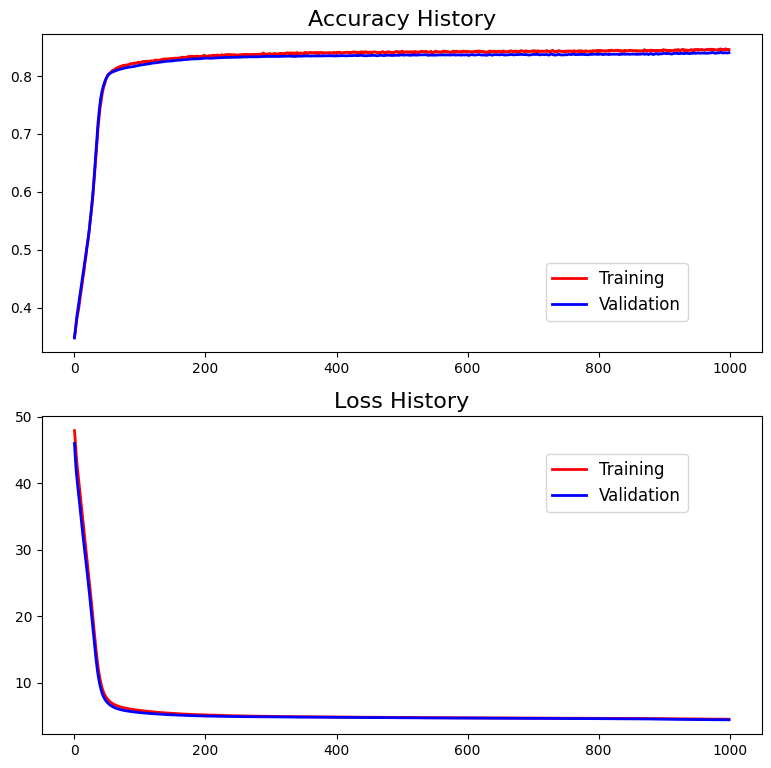

In [16]:
fig = plt.figure(figsize=(8, 10))
# fig.suptitle('History', fontsize = 21)

# Accuracy Plot
ax = plt.subplot(2, 1, 1)
plt.title(f'Accuracy History', fontsize = 16, y = 1)
plt.plot(history1.history["get_Accuracy_tf"], color='r', linewidth=2, label="Training")
plt.plot(history1.history["val_get_Accuracy_tf"], color='b', linewidth=2, label="Validation")
plt.legend(fontsize=12, loc=(0.7, 0.1))

# Loss Plot
ax = plt.subplot(2, 1, 2)
plt.title(f'Loss History', fontsize = 16, y = 1)
plt.plot(history1.history["loss"], color='r', linewidth=2, label="Training")
plt.plot(history1.history["val_loss"], color='b', linewidth=2, label="Validation")
plt.legend(fontsize=12, loc=(0.7, 0.7))

plt.subplots_adjust(right=0.95, left=0.05, top=0.85, bottom=0.15, wspace=0.2, hspace=0.2)
plt.show()

fig.savefig('model1_history.png', dpi=80, bbox_inches='tight')